In [1]:
import numpy as np
import cv2
from IPython.display import Image as IM
from sklearn.mixture import GaussianMixture as GMM
from PIL import Image
import matplotlib.pyplot as plt

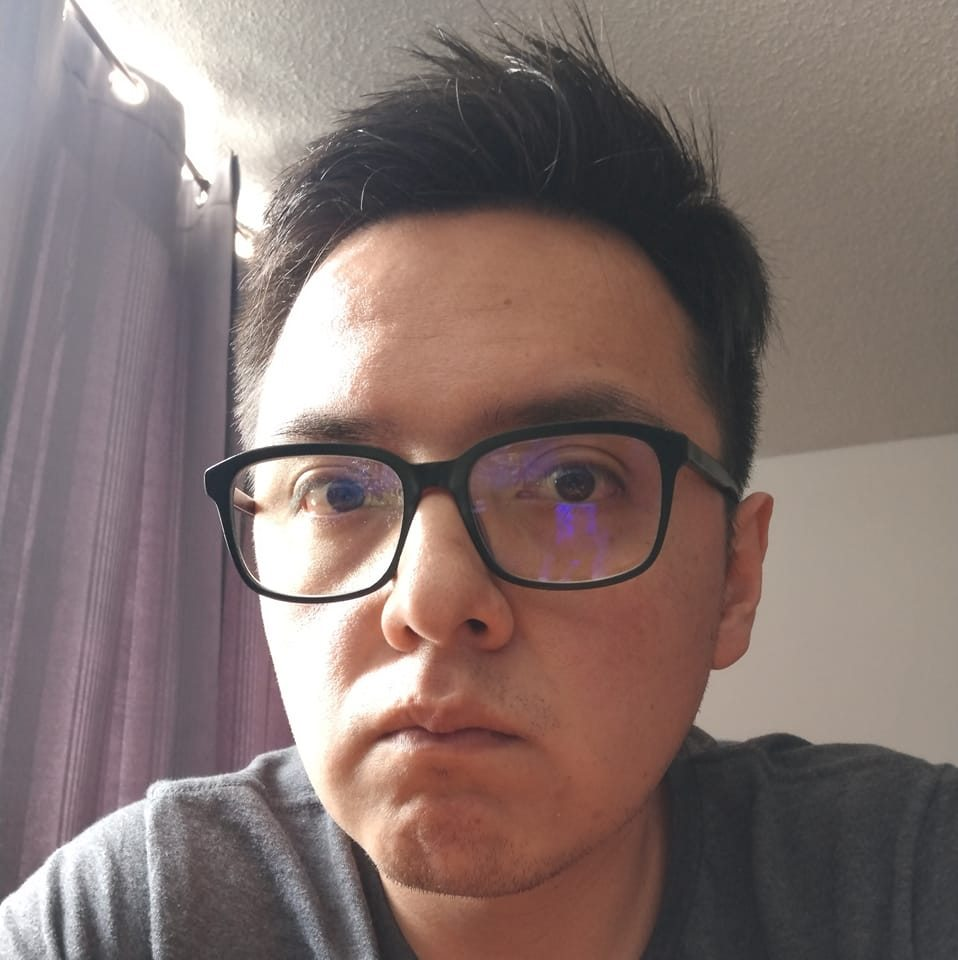

In [2]:
IM("foto.jpeg")

In [3]:
path = "foto.jpeg"

In [4]:
imagen = Image.open(path) 

In [5]:
imagen_gris = imagen.convert("L")
imagen_gris.save(path.split('.')[0]+"_grey.jpg")

In [6]:
path =  path.split('.')[0]+"_grey.jpg"
imagen.close

<bound method Image.close of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=958x960 at 0x7FD07DE3C5E0>>

foto_grey.jpg


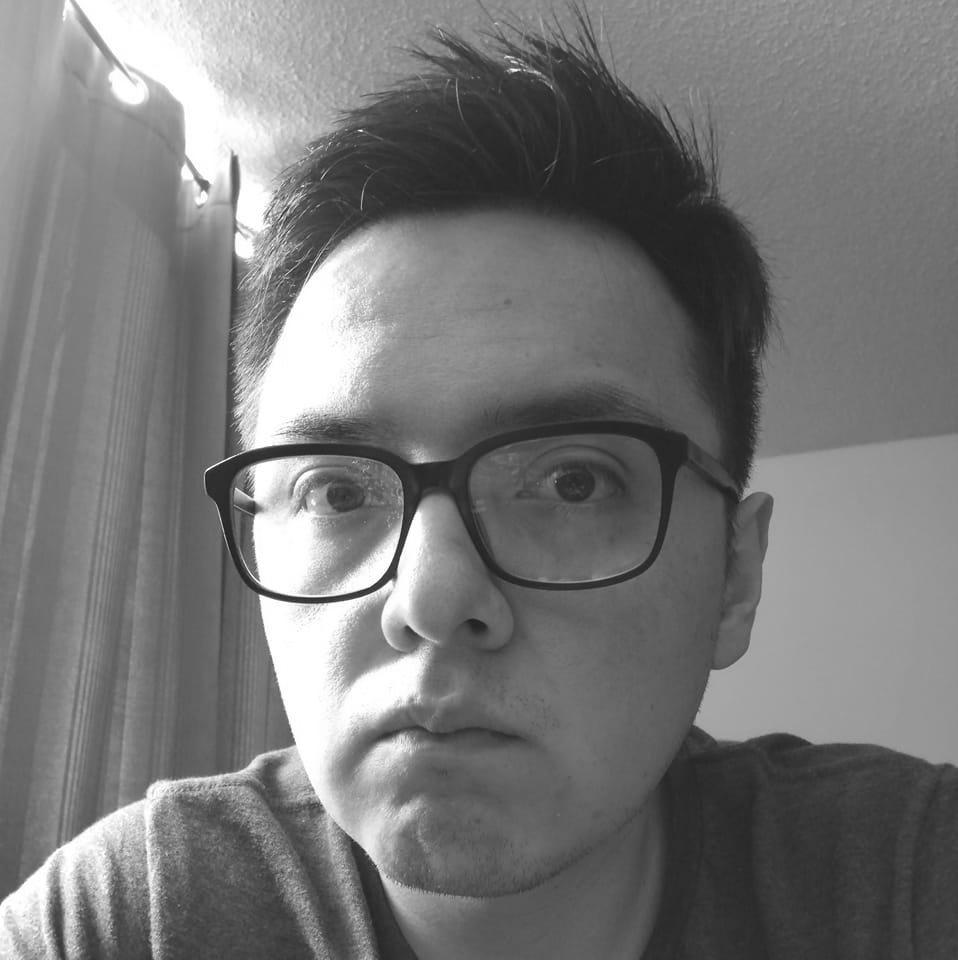

In [7]:
print(path)
IM(path)

In [8]:
imagen = Image.open(path)  
imagen_array = np.array(imagen)

alto, ancho = imagen_array.shape

valores_pixel = []

for y in range(alto):
    for x in range(ancho):
        pixel_valor = imagen_array[y, x]
        valores_pixel.append(pixel_valor)

valores_pixel = np.array(valores_pixel)

Text(0, 0.5, 'Frecuencia')

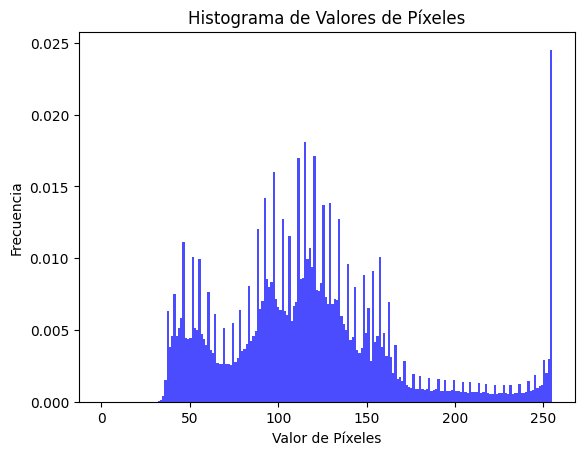

In [9]:
plt.hist(valores_pixel, bins=200, range=(0, 255), density=True, color="blue", alpha=0.7)

plt.title('Histograma de Valores de Píxeles')
plt.xlabel('Valor de Píxeles')
plt.ylabel('Frecuencia')

In [10]:
img=cv2.imread(path)

In [11]:
print(img.shape)
img2 = img.reshape((-1,3))

(960, 958, 3)


In [12]:
print(img2.shape)

(919680, 3)


In [13]:
gmm_model = GMM(n_components=4, covariance_type="full").fit(img2)
gmm_labels = gmm_model.predict(img2)

In [14]:
print(gmm_labels)

[0 0 0 ... 1 1 2]


In [15]:
original_shape = img.shape
segmented = gmm_labels.reshape(original_shape[0],original_shape[1])


In [16]:
print(np.unique(segmented))

[0 1 2 3]


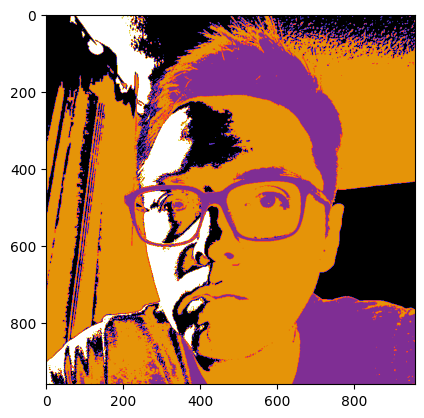

In [30]:
plt.imshow(segmented,cmap="CMRmap")

In [ ]:
means = gmm_model.means_
covariances = gmm_model.covariances_

In [ ]:
x = np.linspace(np.min(img2), np.max(img2), 1000)

In [ ]:
def gaussian_prob(pixel, mean, cov):
    pixel = np.array(pixel)
    return 1 / (np.sqrt((2 * np.pi) ** 3 * np.linalg.det(cov))) * \
    np.exp(-0.5 * np.dot(np.dot((pixel - mean).T, np.linalg.inv(cov)),(pixel - mean)))

In [ ]:
print(means)

In [ ]:
print(covariances)

In [ ]:
print(img.shape)

In [ ]:
gaussian_prob([131,131,131], means[0],covariances[0])

In [ ]:
probs = np.zeros(img2.shape)
for i in range(len(img2)):
    probs[i]= gaussian_prob(img2[i],means[0], covariances[0])



In [ ]:
probs2 = probs.reshape(img.shape)

In [ ]:
plt.imshow(probs2, cmap='tab10')
plt.colorbar()
plt.title('Probabilidad Gaussiana')
plt.show()

In [ ]:
print(probs2)

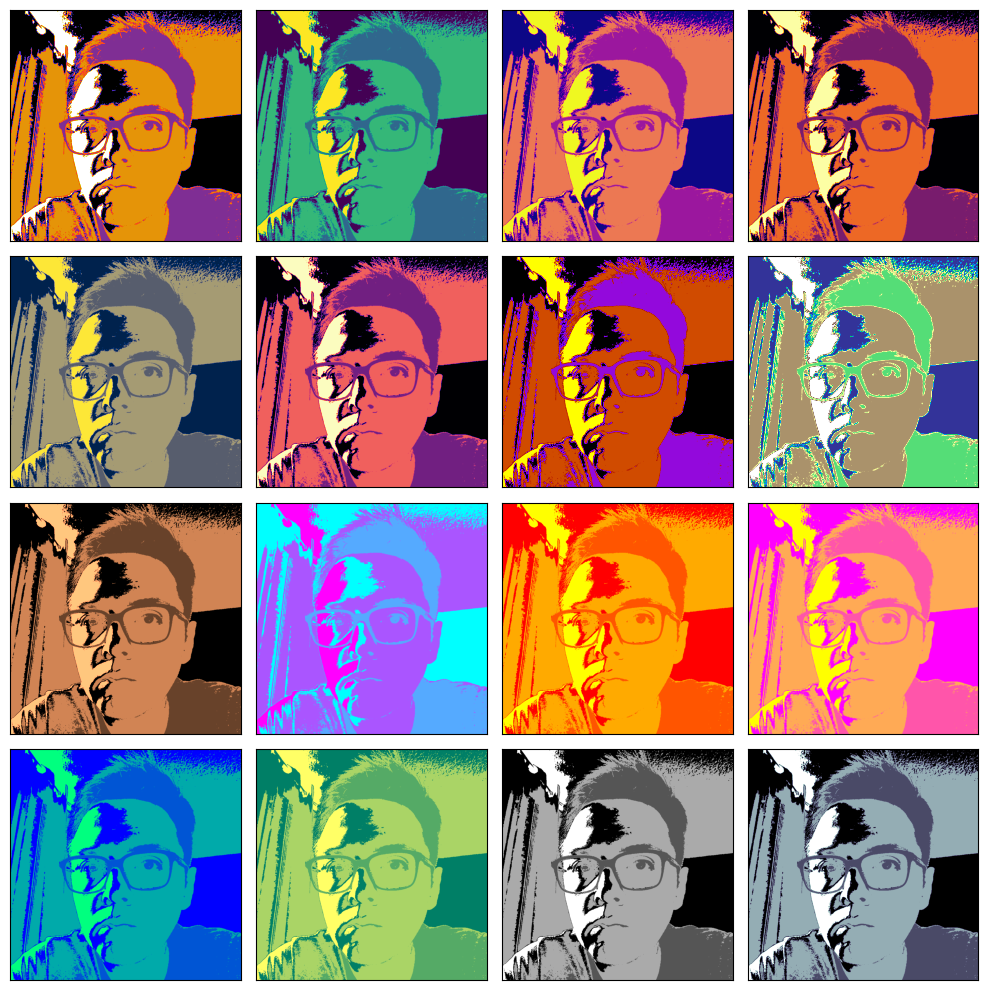

In [37]:

cmaps = ["CMRmap", "viridis", "plasma", "inferno",
         "cividis", "magma", "gnuplot", "terrain",
         "copper", "cool", "autumn", "spring",
         "winter", "summer", "gray", "bone"]


fig, axes = plt.subplots(4, 4, figsize=(10, 10))

for i in range(4):
    for j in range(4):
        cmap_index = i * 4 + j
        cmap_value = cmaps[cmap_index]
        ax = axes[i][j]
        ax.imshow(segmented, cmap=cmap_value)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()
